In [1]:
import pandas as pd
import os

path = r'D:\elice_python\GAS_5\pytest_machine'
os.chdir(path)

In [9]:
data = pd.read_csv('cancer.csv')
print(data.shape)
# print(data.info())

(569, 31)


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)

#일반적인 평가
print('test accuracy : ', logreg.score(X_test,y_test))

test accuracy :  0.958041958041958


In [8]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, prediction)
print('ROC AUC score : ', roc_auc)

ROC AUC score :  0.9472746331236898


#### ROC 커브 그리기

In [10]:
logreg.predict_proba(X_test)[:10]

array([[1.90451227e-02, 9.80954877e-01],
       [9.99012089e-01, 9.87911270e-04],
       [1.13207378e-01, 8.86792622e-01],
       [1.30467967e-01, 8.69532033e-01],
       [1.40854731e-01, 8.59145269e-01],
       [9.99999952e-01, 4.75026598e-08],
       [8.90913985e-01, 1.09086015e-01],
       [9.99993645e-01, 6.35511635e-06],
       [9.83609541e-01, 1.63904586e-02],
       [5.51174138e-03, 9.94488259e-01]])

In [12]:
# 1이 될 확률만을 구한다.(기준값)
proba = logreg.predict_proba(X_test)[:,1]

predict_proba 메서드는 대부분의 모델에서 사용할 수 있지만,
- DecisionTree의 경우 확률값이 아닌 단순히 0,1로 된 결정값을 준다. 
  (확률 정보를 구할 수 없다)
- SVC의 경우 probability=True 로 하면 확률값을 얻을 수 있으나,
  모델의 속도가 느려지고 확률값의 내용이 정확하지 않을 수 있다.
  - SVR 등 회귀분석의 경우에는 적용 가능하다.

##### FP, TP Rate
- roc_curve()를 통하여 FP rate와 TP rate를 구한다.
    - roc_curve 메서드는 FPR, TPR, 그리고 기준값 thresholds를 출력한다.

In [13]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y_test, proba)

print(f'''
      FP rate :
      {fpr}
      
      TP rate :
      {tpr}
      
      thresholds : 
      {thr}
      ''')


      FP rate :
      [0.         0.         0.         0.01886792 0.01886792 0.03773585
 0.03773585 0.05660377 0.05660377 0.09433962 0.09433962 0.11320755
 0.11320755 1.        ]
      
      TP rate :
      [0.         0.01111111 0.91111111 0.91111111 0.95555556 0.95555556
 0.96666667 0.96666667 0.97777778 0.97777778 0.98888889 0.98888889
 1.         1.        ]
      
      thresholds : 
      [           inf 9.99923744e-01 8.69532033e-01 8.59145269e-01
 8.10861986e-01 7.83901879e-01 7.26167710e-01 7.21390666e-01
 6.84714970e-01 5.94708933e-01 5.10860484e-01 4.33408263e-01
 3.36640973e-01 1.22756174e-47]
      


##### ROC 커브
- FPR과 TPR을 이용하여 그래프를 그린다.

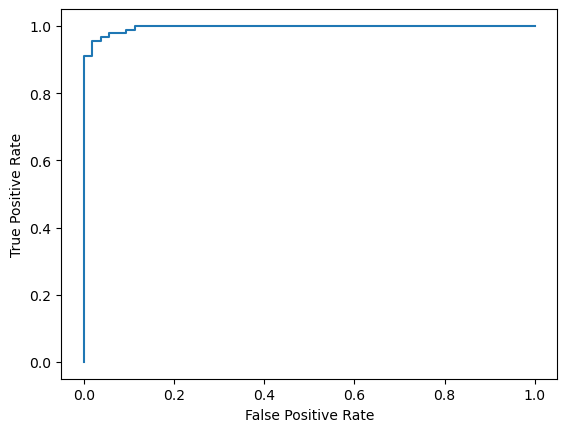

In [14]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()